<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/ANN_Ajuste_mar_2021/PSD_GRAIN_NOT_GRAIN_mar_18_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 4.6MB/s 


In [3]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [4]:
import mahotas.features.texture as mht
import mahotas.features

In [5]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 340 (delta 57), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (340/340), 1.11 MiB | 8.94 MiB/s, done.
Resolving deltas: 100% (194/194), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021


In [6]:
!ls

ANN_Ajuste_mar_2021
ANN_FIND_GRAIN_MAR_2021.py
ANN_FIND_GRAIN_NOVO.py
ANN_FIND_GRAIN_PAPER_STEP_02.py
big_segment.py
CNN_classify_grain_feb_15_2021.ipynb
CNN_DESCRIPTION.ipynb
CNN_FIND_GRAIN_PAPER_STEP_02.py
EPOCHS_graphic.csv
EPOCHS_graphic.txt
Fig_05_BIG_Segmentation_jan_25_2021.ipynb
GetBetterSegm.py
Get_PSDArea_New.py
Graphic_Epochs_fev_09_2020.ipynb
histogram_fev_2021.py
PSD_CNN_GRAIN_NOT_GRAIN_step_02_paper.ipynb
PSD_GRAIN_NOT_GRAIN_dez_04_2020.ipynb
PSD_GRAIN_NOT_GRAIN_fev_18_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_11_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_12_2021.ipynb
PSD_GRAIN_NOT_GRAIN_step_02_paper.ipynb
psd_mahotas.py
__pycache__
README.md
Segment_Ajuste_mar_2021
SEGMENT_NOT_CONCLUDED.ipynb


In [7]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 308 (delta 23), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (308/308), 115.76 MiB | 38.89 MiB/s, done.
Resolving deltas: 100% (140/140), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado


In [8]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 308 (delta 23), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (308/308), 78.60 MiB | 38.14 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [10]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 340 (delta 57), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (340/340), 1.11 MiB | 9.30 MiB/s, done.
Resolving deltas: 100% (194/194), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021


In [11]:
from big_segment import Segmenta  # got image provided segmented
# from ANN_FIND_GRAIN_NOVO import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [12]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021
%cd ANN_Ajuste_mar_2021

fatal: destination path 'ANN_Ajuste_mar_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021


In [13]:
from ANN_FIND_GRAIN_change_ann import AnnGrain  # got image provided segmented

In [14]:
!ls

ANN_deploy_neural_network_mar_22_2021.ipynb
ANN_FIND_GRAIN_change_ann.py
ANN_load_neural_network_mar_23_2021.ipynb
ANN_load_top_okay_neural_network_mar_23_2021.ipynb
ANN_neural_network_load_mar_22_2021.ipynb
big_segment_new.py
knn_find_grain_change_classification.py
PSD_find_neural_network_mar_18_2021.ipynb
PSD_GRAIN_NOT_GRAIN_kNN_abril_07_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_18_2021.ipynb
__pycache__


In [15]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 308 (delta 23), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (308/308), 78.60 MiB | 38.23 MiB/s, done.
Resolving deltas: 100% (146/146), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado


In [16]:
# open file to get df 
# use df and ANN to get grains and no grains
# use grains to obtain psd

In [17]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Cloning into 'Doutorado'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 308 (delta 23), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (308/308), 78.60 MiB | 38.88 MiB/s, done.
Resolving deltas: 100% (146/146), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado/Doutorado


In [18]:
k=0
for Item in img_name:
  print(k,Item)
  k=k+1

img=ww[21]


0 Fotos_Grandes-3cdAmostra/Q6-8-4.jpg
1 Fotos_Grandes-3cdAmostra/Q6-5-3.jpg
2 Fotos_Grandes-3cdAmostra/Q6-7-4.jpg
3 Fotos_Grandes-3cdAmostra/Q6-8-2.jpg
4 Fotos_Grandes-3cdAmostra/Q6-3-2.jpg
5 Fotos_Grandes-3cdAmostra/Q6-7-2.jpg
6 Fotos_Grandes-3cdAmostra/Q6-4-4.jpg
7 Fotos_Grandes-3cdAmostra/Q6-9-5.jpg
8 Fotos_Grandes-3cdAmostra/Q6-2-5.jpg
9 Fotos_Grandes-3cdAmostra/Q6-8-3.jpg
10 Fotos_Grandes-3cdAmostra/Q6-9-3.jpg
11 Fotos_Grandes-3cdAmostra/Q6-1-2.jpg
12 Fotos_Grandes-3cdAmostra/Q6-6-3.jpg
13 Fotos_Grandes-3cdAmostra/Q6-3-4.jpg
14 Fotos_Grandes-3cdAmostra/Q6-1-4.jpg
15 Fotos_Grandes-3cdAmostra/Q6-6-2.jpg
16 Fotos_Grandes-3cdAmostra/Q6-4-3.jpg
17 Fotos_Grandes-3cdAmostra/Q6-7-3.jpg
18 Fotos_Grandes-3cdAmostra/Q6-2-2.jpg
19 Fotos_Grandes-3cdAmostra/Q6-9-2.jpg
20 Fotos_Grandes-3cdAmostra/Q6-1-5.jpg
21 Fotos_Grandes-3cdAmostra/Q6-6-5.jpg
22 Fotos_Grandes-3cdAmostra/Q6-2-1.jpg
23 Fotos_Grandes-3cdAmostra/Q6-5-2.jpg
24 Fotos_Grandes-3cdAmostra/Q6-4-1.jpg
25 Fotos_Grandes-3cdAmostra/Q6-3-1.

In [19]:
df=Segmenta(img)

In [20]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 

Predicted   0   1
Actual           
0          72   0
1           0  75


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
print(METRICS)
# grain class is number zero

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        75

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147



In [22]:
# print(y_pred.ravel())

In [23]:
Grain=[]; Ind=[]; Size=[]
k=0
for item in y_pred:
  if(item == 1):
    Ind.append(k)
  k=k+1

df = df.reset_index(drop=True)

df_size = df.drop(df.index[Ind])

Width=np.array(df_size['Width'])

# print(Width)

# print(df_size.shape)

In [24]:
# pd.set_option('display.max_rows', None)
# print(df_size)

In [25]:
df.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,153,49.137897,57.055367,60.793457,69.099243,81.562263,35.413174,46.590797,55.873981,58.178139,53.562733,71.069847,75.639626,68.557648,65.720284,66.272339,67.335602,66.515488,71.575760,76.027000,82.276306,90.343712,92.528168,85.156013,77.374992,77.651848,61.327015,41.663166,27.451281,51.589088,62.236279,62.270153,81.385277,67.797394,16.972149,9.332138,17.800421,20.818317,44.071510,79.459618,...,1.821180,1.996668,2.014738,2.141100,2.281046,2.320774,2.331027,2.386304,2.343244,2.234397,2.526251,2.464052,2.714084,2.915033,2.915033,2.915033,2.915033,2.915033,2.906660,2.732026,2.692554,2.549020,2.541117,2.712931,2.692597,2.721304,2.783502,2.816993,2.904780,2.915033,2.927805,3.000000,2.882780,2.668418,2.767013,2.946175,3.043061,2.953351,3.000000,3.000000
1,158,67.677612,67.630829,70.665604,68.699249,72.931732,75.403145,81.679375,85.278473,87.190353,89.126266,74.779205,61.984776,60.995037,54.730335,51.999840,58.790737,66.739784,72.727600,82.028679,92.092453,100.143074,107.376534,114.397369,118.650864,117.933510,112.562561,114.505997,108.345772,70.070496,70.110237,70.417564,71.571861,74.132195,74.916679,78.993584,84.846176,90.671524,92.585640,81.924850,...,2.594937,2.545586,2.568018,2.675693,2.846179,3.000000,2.849704,2.993270,3.000000,2.984618,2.794103,2.660471,3.116648,3.444160,3.495754,3.493831,3.645570,3.392725,3.408268,3.412754,3.302836,3.235539,3.435186,3.340971,3.000000,3.314052,3.448646,3.367890,3.000000,3.049351,3.107675,3.031405,3.219836,3.287133,3.352187,3.352187,3.141323,3.266944,3.155264,3.427976
2,124,97.776268,96.070747,92.506760,89.646194,89.277832,87.391258,87.754417,89.918823,91.116539,92.037460,90.700310,87.370438,87.573349,86.395409,86.572311,91.167534,101.694069,109.705505,112.762733,113.735687,114.044739,124.214355,137.284073,156.483871,170.796051,203.886581,231.170624,239.704453,100.785637,100.327774,97.285118,91.380844,87.778351,86.379807,86.232048,86.683655,88.663879,91.268463,90.118622,...,2.568158,2.552549,2.475546,2.831425,2.580645,2.409989,2.831425,2.806451,2.777315,2.777315,2.777315,2.930281,2.830385,2.677419,2.633715,2.438085,2.999999,2.470343,2.837668,2.881373,2.761706,2.839750,3.000000,2.999999,3.000000,2.999999,3.000000,2.791883,2.677419,2.714880,2.748178,3.127992,2.999999,3.000000,3.000000,3.000000,3.116545,3.094693,2.883454,3.116545
3,174,134.938721,24.595984,49.242836,52.060646,58.559650,67.335182,68.912544,68.593079,71.414337,69.196861,71.895760,73.424110,95.602463,95.965004,99.223160,98.503113,90.752548,83.823502,78.850853,74.177834,74.067520,77.518700,84.526489,85.115211,47.718853,39.897480,41.074387,52.676712,138.135162,75.041504,53.126308,57.087200,57.078346,66.215363,71.557541,72.258568,77.918488,73.271111,73.924568,...,95.713043,95.393318,92.235832,97.344841,103.153931,97.416832,56.704453,46.854279,50.114288,52.488441,56.339016,58.253403,78.273621,78.850182,98.592422,101.474968,89.459908,95.469688,97.531647,98.908318,93.998413,89.401245,86.672485,86.008194,87.608536,89.945175,92.350647,95.637215,101.010452,100.458710,98.151283,100.379059,103.021545,98.184441,56.065533,49.700626,49.609863,49.777649,53.017311,55.842781
4,139,83.265045,83.036064,78.858650,80.709900,83.966202,91.265305,106.365189,117.549088,125.253967,133.027573,136.952850,146.164276,149.182693,135.524307,117.129639,102.377411,101.931213,129.981308,152.119247,122.085503,100.737228,99.316284,108.116295,120.188950,115.778221,96.446808,66.463898,59.176796,73.223740,77.755386,82.342926,83.976601,81.975716,79.956474,82.220474,82.775322,90.280312,105.835716,119.976501,...,179.938568,149.604919,69.716667,92.654305,93.965622,94.708336,100.200768,100.963654,98.925003,100.343666,103.934212,108.978256,153.544632,151.610382,128.581390,129.533401,132.613159,133.896637,

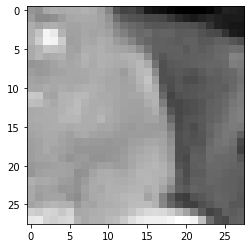

In [53]:
Size=28
qual_img=9
L = Width[qual_img]
data=np.array(df_size.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [27]:
mean_value = np.mean(img)
img_new = img.copy()

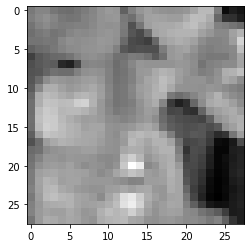

In [28]:
'''
for i in range(28):
  for j in range(28):
    if img[i,j] < mean_value:
      img_new[i,j] = 255
    else:
      img_new[i,j] = 0
'''
img28=cv2.resize(img_new,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")


In [29]:
L = Width[qual_img]
Area = np.sum(img_new) / (255.0 * 28 * 28)* L*L
print(Area)

7959.509163665466


In [30]:
Area_All, Diameter_All=PSDArea(df_size) 


In [31]:
df_size.shape

(75, 785)

In [32]:
# print(Area_All)
print(Diameter_All)

[1.366261549715103, 1.5768069902417352, 1.4752581475564666, 1.0948869289367549, 0.8122701110057926, 1.0087276135338752, 1.103900771653503, 1.1487530719471553, 1.053235317888192, 0.8427135586621359, 1.5137231742460562, 1.802633605667018, 1.2060670373609623, 1.362565174117361, 1.7672022333732185, 1.408313488869508, 1.6311235247354994, 1.575003449094711, 1.3776247787400184, 1.5871191766319839, 1.3509611393876975, 1.46678753166474, 1.2449216982139166, 1.3668471984366675, 0.9322662561689766, 0.872768867755353, 1.289701793373818, 0.9696953165206389, 1.1951034291715024, 0.8524335837035956, 0.9411079069535098, 1.283501346652191, 1.5607932966496725, 1.6687356646911529, 1.3730425537155335, 1.2645873654262298, 1.139058137001797, 1.4422050278741445, 0.9338234616131159, 1.5950173276571817, 1.5192233449683203, 1.495928270808543, 0.8786760717595897, 1.2585399191444375, 1.3925201304736234, 1.7264248413399403, 1.642815584514893, 1.6914188971073871, 0.9799510094095192, 1.348472677814382, 0.8779067409312

In [33]:
diam = Diameter_All.copy()
PSD_value, Perc_value = PSD(diam)
print(Perc_value)

[ 0.          0.          0.          0.          0.          0.
  0.          4.         14.66666667 10.66666667 70.66666667]


In [34]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 9.60 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado/Doutorado/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [35]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [36]:
PSD_new

,Juntas,Area
0,1,2.001
1,2,0.820
2,3,1.270
3,4,0.958
4,5,1.162
...,...,...
90,30,1.064
91,31,1.341
92,32,1.044
93,33,1.337


In [37]:
PSD_new, Perc_new = PSD(Diam1)  # imageJ
print(Perc_new)
print(Perc_value)

[ 0.          0.          0.          0.          0.          0.
  0.          4.21052632 10.52631579 23.15789474 62.10526316]
[ 0.          0.          0.          0.          0.          0.
  0.          4.         14.66666667 10.66666667 70.66666667]


In [38]:
np.sum(np.array(Perc_value))

100.0

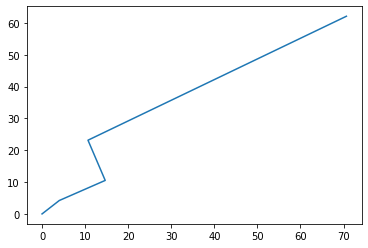

In [39]:
plt.plot( Perc_value,Perc_new )

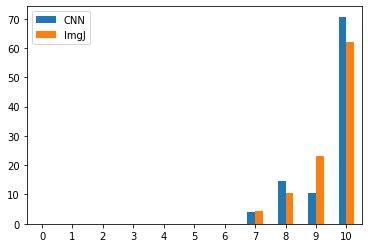

In [40]:
PSD_comparison = pd.DataFrame({ 'CNN':Perc_value,'ImgJ':Perc_new})
ax = PSD_comparison.plot.bar(rot=0)

In [41]:
results = smf.ols('ImgJ ~ CNN', data=PSD_comparison).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   ImgJ   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     169.0
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           3.89e-07
Time:                        20:57:28   Log-Likelihood:                -31.063
No. Observations:                  11   AIC:                             66.13
Df Residuals:                       9   BIC:                             66.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0911      1.491      0.732      0.4

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


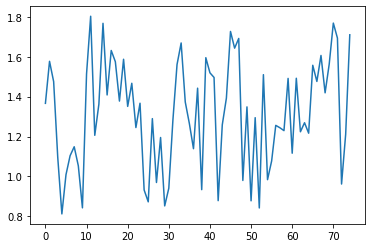

In [42]:
#plt.plot(Diam)
plt.plot(Diameter_All)

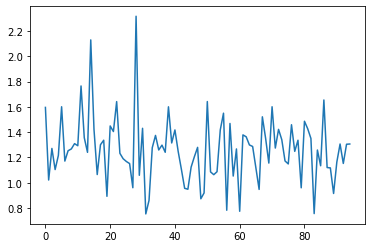

In [43]:
plt.plot(Diam1)

In [44]:
df_diam=pd.DataFrame(Diam1)
df_diam.describe()

,0
count,95.000000
mean,1.260307
std,0.258410
min,0.753568
25%,1.117893
50%,1.267607
75%,1.376667
max,2.317439


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


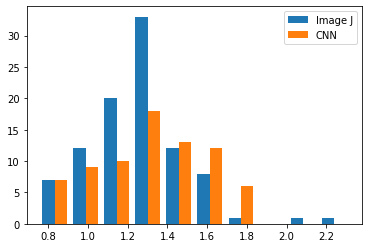

In [45]:
plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])

(array([ 7.,  8.,  4.,  5., 13.,  8.,  9., 10.,  6.,  5.]),
 array([0.81227011, 0.91130646, 1.01034281, 1.10937916, 1.20841551,
        1.30745186, 1.40648821, 1.50552456, 1.60456091, 1.70359726,
        1.80263361]),
 <a list of 10 Patch objects>)

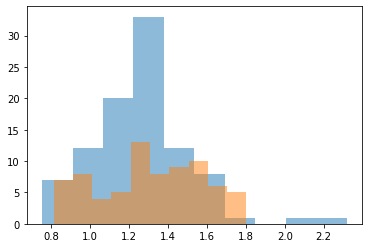

In [46]:
plt.hist(Diam1, alpha=0.5)
plt.hist(Diameter_All, alpha=0.5)